In [40]:
import pandas as pd
import numpy as np
from numpy import unique
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import statistics as s
from tensorflow import keras
from keras.utils import np_utils


In [41]:
df= pd.read_csv("dataset.csv")

In [42]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [43]:
df["flag"].unique()


array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [44]:
df["flag"].replace({
    'SF': 0,
    'S0': 1,
    'REJ': 2,
    'RSTR':3,
    'SH': 4,
    'RSTO': 5,
    'S1': 6,
    'RSTOS0': 7,
    'S3':8,
    'S2':9,
    'OTH':10  
}, inplace=True)

In [45]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [46]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
125968,0,tcp,private,1,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,0,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,0,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,1,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,0,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [47]:
df["service"].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [48]:
labels = df['service'].astype('category').cat.categories.tolist()
replace1={'service' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df.replace(replace1,inplace=True)


In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,21,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,45,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,50,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,25,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,25,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [50]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [51]:
df["attack_category"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [52]:
df["protocol_type"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [53]:
df["protocol_type"].replace({
    'tcp': 0,
    'udp': 1,
    'icmp': 2,
}, inplace=True)

In [54]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,0,21,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,45,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,50,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,0,25,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,25,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [55]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)
        df.drop(col,inplace=True,axis=1)

num_outbound_cmds


In [56]:
df.shape

(125973, 42)

In [57]:
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,0,21,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,45,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,50,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,0,25,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,25,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [58]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,0,21,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,45,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,50,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,0,25,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,25,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [59]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,0,21,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,45,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,50,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,0,25,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,25,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [60]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,0,21,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,45,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,50,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,0,25,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,25,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [61]:
df1 = pd.read_csv("attack_types1.csv")

In [62]:
df1.head()

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos


In [63]:
df1['attack_type'].unique()

array(['dos', 'u2r', 'r2l', 'probe'], dtype=object)

In [64]:
df1['attack_category'].unique()

array(['apache2', 'back', 'mailbomb', 'processtable', 'snmpgetattack',
       'teardrop', 'smurf', 'land', 'neptune', 'pod', 'udpstorm', 'ps',
       'buffer_overflow', 'perl', 'rootkit', 'loadmodule', 'xterm',
       'sqlattack', 'httptunnel', 'ftp_write', 'guess_passwd',
       'snmpguess', 'imap', 'spy', 'warezclient', 'warezmaster',
       'multihop', 'phf', 'named', 'sendmail', 'xlock', 'xsnoop', 'worm',
       'nmap', 'ipsweep', 'portsweep', 'satan', 'mscan', 'saint'],
      dtype=object)

In [65]:
df['attack_category'].replace({
    'normal':'normal',
    'neptune':'dos',
    'warezclient':'r2l',
    'ipsweep':'probe',
    'portsweep':'probe',
    'teardrop':'dos',
    'nmap':'probe',
    'satan':'probe',
    'smurf':'dos',
    'pod':'dos',
    'back':'dos',
    'guess_passwd':'r2l',
    'ftp_write':'r2l',
    'multihop':'r2l',
    'rootkit':'u2r',
    'buffer_overflow':'u2r',
    'imap':'r2l',
    'warezmaster':'r2l',
    'phf':'r2l',
    'land':'dos',
    'loadmodule':'u2r',
    'spy':'r2l',
    'perl':'u2r'
}, inplace=True)

In [66]:
#dummies=pd.get_dummies(df.attack_category)
#merged = pd.concat([df,dummies],axis='columns')
#merged
#final= merged.drop(['attack_category','normal'], axis='columns')
#final



In [67]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,0,21,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,1,45,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,50,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,0,25,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,0,25,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [68]:

scaler = MinMaxScaler()
S = list()
for column in df:
    if column == 'attack_category':
        continue 
    else:
        S.append(column)

df[S] = scaler.fit_transform(df[S])





In [81]:
for col in df:
    if col == 'attack_category':
        continue
    else:
        if df.var()[col] < 0.01:
            del df[col]
            print(col)
        

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
is_host_login
is_guest_login


In [82]:
x= df.drop(['attack_category'], axis='columns')
y= df['attack_category']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [83]:
y.shape

(125973,)

In [84]:
#X = final.drop(['dos','u2r','probe','r2l'], axis ='columns')
#y = dummies
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 6)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)



In [85]:
X_train.shape

(70544, 24)

In [86]:
y_train.shape

(70544,)

In [87]:

y_test.shape

(37792,)

Epoch 1/10
2205/2205 [==============================] - 2s 776us/step - loss: 0.4075 - accuracy: 0.8868 - val_loss: 0.0673 - val_accuracy: 0.9792
Epoch 2/10
2205/2205 [==============================] - 2s 729us/step - loss: 0.0591 - accuracy: 0.9833 - val_loss: 0.0311 - val_accuracy: 0.9921
Epoch 3/10
2205/2205 [==============================] - 2s 700us/step - loss: 0.0359 - accuracy: 0.9903 - val_loss: 0.0264 - val_accuracy: 0.9924
Epoch 4/10
2205/2205 [==============================] - 2s 697us/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0238 - val_accuracy: 0.9923
Epoch 5/10
2205/2205 [==============================] - 2s 739us/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0203 - val_accuracy: 0.9939
Epoch 6/10
2205/2205 [==============================] - 2s 795us/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0174 - val_accuracy: 0.9950
Epoch 7/10
2205/2205 [==============================] - 2s 821us/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0195 -

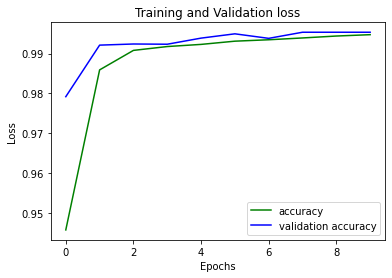

In [88]:
model1 = keras.Sequential([
        keras.layers.Dense(40, input_shape=(24,), activation='relu'),
        keras.layers.Dense(36,input_shape=(24,), activation='sigmoid'),
        keras.layers.Dense(8,input_shape=(24,), activation='tanh'),
        keras.layers.Dense(5, activation='softmax')])
    
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=10,validation_data=(X_val, y_val))
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
2205/2205 [==============================] - 3s 1ms/step - loss: 0.4442 - accuracy: 0.8657 - val_loss: 0.0696 - val_accuracy: 0.9781
Epoch 2/10
2205/2205 [==============================] - 2s 756us/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0385 - val_accuracy: 0.9908
Epoch 3/10
2205/2205 [==============================] - 2s 724us/step - loss: 0.0368 - accuracy: 0.9897 - val_loss: 0.0258 - val_accuracy: 0.9930
Epoch 4/10
2205/2205 [==============================] - 2s 751us/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0221 - val_accuracy: 0.9934
Epoch 5/10
2205/2205 [==============================] - 2s 771us/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0200 - val_accuracy: 0.9944
Epoch 6/10
2205/2205 [==============================] - 2s 731us/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0177 - val_accuracy: 0.9946
Epoch 7/10
2205/2205 [==============================] - 2s 738us/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0180 - v

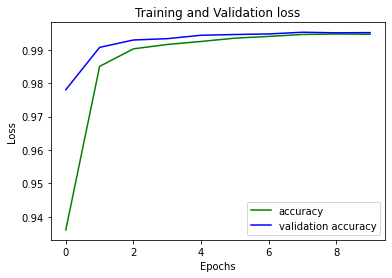

In [89]:

model2 = keras.Sequential([
        keras.layers.Dense(28,input_shape=(24,), activation='relu'),
        keras.layers.Dense(19,input_shape=(24,), activation='sigmoid'),
        keras.layers.Dense(12,input_shape=(24,), activation='tanh'),
        keras.layers.Dense(5,activation='softmax')])

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
2205/2205 [==============================] - 3s 1ms/step - loss: 0.1835 - accuracy: 0.9435 - val_loss: 0.0255 - val_accuracy: 0.9922
Epoch 2/10
2205/2205 [==============================] - 2s 940us/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0211 - val_accuracy: 0.9938
Epoch 3/10
2205/2205 [==============================] - 2s 914us/step - loss: 0.0231 - accuracy: 0.9932 - val_loss: 0.0183 - val_accuracy: 0.9949
Epoch 4/10
2205/2205 [==============================] - 2s 912us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0169 - val_accuracy: 0.9956
Epoch 5/10
2205/2205 [==============================] - 2s 1ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0149 - val_accuracy: 0.9955
Epoch 6/10
2205/2205 [==============================] - 2s 950us/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 7/10
2205/2205 [==============================] - 2s 823us/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0193 - val

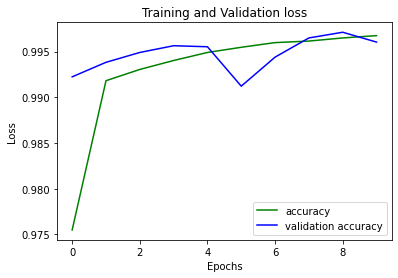

In [90]:
    
model3 = keras.Sequential([
       keras.layers.Dense(41, input_shape=(24,), activation='relu'),
       keras.layers.Dense(41,input_shape=(24,), activation='tanh'),
       keras.layers.Dense(60,input_shape=(24,), activation='tanh'),
       keras.layers.Dense(5, activation='softmax')])
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model3.fit(X_train, y_train,epochs=10,  validation_data=(X_val, y_val))
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
import tensorflow as tf
from tensorflow import keras 
from sklearn.preprocessing import LabelEncoder
def model1st():
    model1 = keras.Sequential([
        keras.layers.Dense(40, input_shape=(24,), activation='relu'),
        keras.layers.Dense(36,input_shape=(24,), activation='sigmoid'),
        keras.layers.Dense(8,input_shape=(24,), activation='tanh'),
        keras.layers.Dense(5, activation='softmax')])
    
    model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1
def model2nd():
    model2 = keras.Sequential([
        keras.layers.Dense(28,input_shape=(24,), activation='relu'),
        keras.layers.Dense(19,input_shape=(24,), activation='sigmoid'),
        keras.layers.Dense(12,input_shape=(24,), activation='tanh'),
        keras.layers.Dense(5,activation='softmax')])
     
    model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model2
 
    
    
def model3rd():
    model3 = keras.Sequential([
       keras.layers.Dense(41, input_shape=(24,), activation='relu'),
       keras.layers.Dense(41,input_shape=(24,), activation='tanh'),
       keras.layers.Dense(60,input_shape=(24,), activation='tanh'),
       keras.layers.Dense(5, activation='softmax')])
    model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model3


neural_network1= KerasClassifier(build_fn=model1st, epochs=5, batch_size=100,)
neural_network1._estimator_type = "classifier"
neural_network2= KerasClassifier(build_fn=model2nd,epochs=5, batch_size=100,)    
neural_network2._estimator_type = "classifier"
neural_network3= KerasClassifier(build_fn=model3rd,epochs=5, batch_size=100,)
neural_network3._estimator_type = "classifier"



ensemble_model = VotingClassifier(estimators = [('ANN1',neural_network1 ), ('ANN2', neural_network2), ('ANN3', neural_network3)], voting = 'hard')


history = ensemble_model.fit(X_train, y_train)
test_acc1 = ensemble_model.score(X_test,y_test)
val_acc1=ensemble_model.score(X_val, y_val)
print("test accuracy of the ensemble: ", test_acc1)
print("validation accuracy of the ensemble: ", val_acc1)




Epoch 1/5
706/706 [==============================] - 1s 744us/step - loss: 0.5244 - accuracy: 0.8397
Epoch 2/5
706/706 [==============================] - 1s 838us/step - loss: 0.1069 - accuracy: 0.9705
Epoch 3/5
706/706 [==============================] - 1s 789us/step - loss: 0.0516 - accuracy: 0.9862
Epoch 4/5
706/706 [==============================] - 1s 741us/step - loss: 0.0371 - accuracy: 0.9902
Epoch 5/5
706/706 [==============================] - 1s 769us/step - loss: 0.0334 - accuracy: 0.9908
Epoch 1/5
706/706 [==============================] - 1s 663us/step - loss: 0.7645 - accuracy: 0.7183
Epoch 2/5
706/706 [==============================] - 0s 631us/step - loss: 0.1366 - accuracy: 0.9641
Epoch 3/5
706/706 [==============================] - 1s 894us/step - loss: 0.0776 - accuracy: 0.9777
Epoch 4/5
706/706 [==============================] - 1s 911us/step - loss: 0.0535 - accuracy: 0.9847
Epoch 5/5
706/706 [==============================] - 1s 906us/step - loss: 0.0398 - accurac

C:\Users\DPS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\DPS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it 

test accuracy of the ensemble:  0.9915061388653683
validation accuracy of the ensemble:  0.9933662187446844


In [92]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:

y_pred = knn.predict(x)


In [94]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [95]:

del df['attack_category']
df['attack_category']=pd.Series(y_pred)


In [96]:

df['attack_category'] = label_encoder.fit_transform(df['attack_category'])
scaler = MinMaxScaler()
S = list()
for column in df:
    S.append(column)
df[S] = scaler.fit_transform(df[S])



In [97]:
df['attack_category'].unique()

array([0.25, 0.  , 0.75, 0.5 , 1.  ])

In [98]:
x= df.drop(['attack_category'], axis='columns')
y= df['attack_category']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 6)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Epoch 1/5
706/706 [==============================] - 1s 993us/step - loss: 0.5533 - accuracy: 0.8144
Epoch 2/5
706/706 [==============================] - 1s 886us/step - loss: 0.1174 - accuracy: 0.9693
Epoch 3/5
706/706 [==============================] - 1s 866us/step - loss: 0.0721 - accuracy: 0.9800
Epoch 4/5
706/706 [==============================] - 1s 875us/step - loss: 0.0411 - accuracy: 0.9885
Epoch 5/5
706/706 [==============================] - 1s 789us/step - loss: 0.0324 - accuracy: 0.9918
Epoch 1/5
706/706 [==============================] - 1s 871us/step - loss: 0.6736 - accuracy: 0.7839
Epoch 2/5
706/706 [==============================] - 1s 910us/step - loss: 0.1177 - accuracy: 0.9655
Epoch 3/5
706/706 [==============================] - 1s 943us/step - loss: 0.0631 - accuracy: 0.9803
Epoch 4/5
706/706 [==============================] - 1s 854us/step - loss: 0.0446 - accuracy: 0.9881
Epoch 5/5
706/706 [==============================] - 1s 885us/step - loss: 0.0375 - accurac

C:\Users\DPS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\DPS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it 

test accuracy of the ensemble:  0.9923528789161727
validation accuracy of the ensemble:  0.9938198106253898


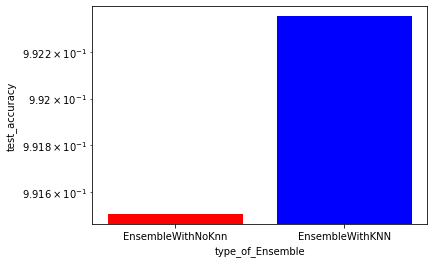

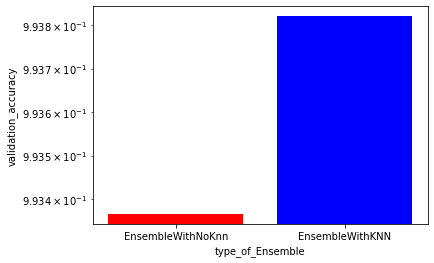

In [100]:
ensemble_model = VotingClassifier(estimators = [('ANN1',neural_network1 ), ('ANN2', neural_network2), ('ANN3', neural_network3)], voting = 'hard')
ensemble_model.fit((X_train), (y_train))
test_acc2 = ensemble_model.score(X_test,y_test)
val_acc2 = ensemble_model.score(X_val, y_val)
print("test accuracy of the ensemble: ", test_acc2)
print("validation accuracy of the ensemble: ", val_acc2)

color1 = 'red'
color2 = 'blue'
plt.bar(1, test_acc1, color=color1)
plt.bar(2, test_acc2, color=color2)

plt.xticks([1,2], ('EnsembleWithNoKnn', 'EnsembleWithKNN'))
plt.xlabel('type_of_Ensemble')
plt.ylabel('test_accuracy')
plt.yscale("log")
plt.show()



color1 = 'red'
color2 = 'blue'
plt.bar(1, val_acc1, color=color1)
plt.bar(2, val_acc2, color=color2)

plt.xticks([1,2], ('EnsembleWithNoKnn', 'EnsembleWithKNN'))
plt.xlabel('type_of_Ensemble')
plt.ylabel('validation_accuracy')
plt.yscale("log")
plt.show()
